In [1]:
%pip install torch numpy ipywidgets

Note: you may need to restart the kernel to use updated packages.


# LSTM Example

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        # self.num_layers is the number of stacked LSTM layers.
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # h0 and c0 are the initial hidden state and cell state of the LSTM, respectively.
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        # out[:, -1, :] selects the output of the last time step in the sequence for each batch.
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
input_size = 1      # Number of features in the input
hidden_size = 50    # Number of features in the hidden state
num_layers = 1      # Number of recurrent layers
output_size = 1     # Number of output features

model = SimpleLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

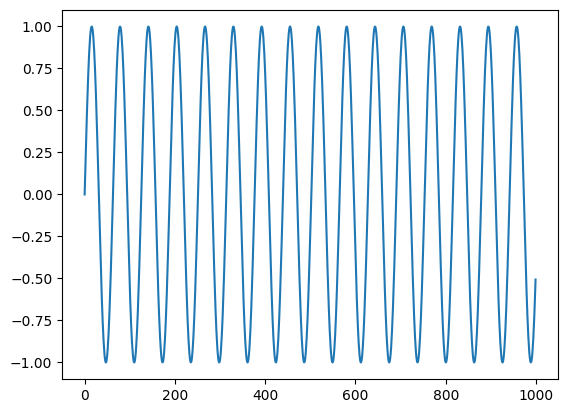

In [5]:
# Create dummy data
seq_length = 10
data = np.sin(np.linspace(0, 100, 1000))  # Sine wave data

# Create sequences of data
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)

# Convert to PyTorch tensors
X = torch.from_numpy(X).float().unsqueeze(-1)  # Shape: (num_samples, seq_length, input_size)
y = torch.from_numpy(y).float().unsqueeze(-1)  # Shape: (num_samples, output_size)

plt.plot(data)
plt.show()

In [6]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.4408
Epoch [20/100], Loss: 0.3392
Epoch [30/100], Loss: 0.1915
Epoch [40/100], Loss: 0.1263
Epoch [50/100], Loss: 0.1018
Epoch [60/100], Loss: 0.0834
Epoch [70/100], Loss: 0.0551
Epoch [80/100], Loss: 0.0201
Epoch [90/100], Loss: 0.0055
Epoch [100/100], Loss: 0.0020


In [7]:
model.eval()
with torch.no_grad():
    test_seq = torch.from_numpy(data[-seq_length:]).float().unsqueeze(0).unsqueeze(-1)
    prediction = model(test_seq)
    print(f'Prediction: {prediction.item()}')

Prediction: -0.46204525232315063
